# Laboratorio 13 Motifs

La idea principal detrás del análisis de motifs es la siguiente: contar estructuras (subgrafos) de interés dentro del gráfico, con el fin de detectar estructuras sobre o sub representadas.

Para esto vamos a ver algunos casos básicos de como encontrar dichos motifs y analizar si la cantidad de estos es significativa.


Contenidos:

1.   Definición Motifs
2.   Contando Cliques
3.   Contar Motifs en General
4.   Z-score



In [1]:
import itertools
import random
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Motifs

El análisis de motifs extiende la definición de coeficiente de clusterización en donde sólo contamos triángulos. Para el caso de motifs, estructuras arbitrarias pueden ser de interés. Aquellos subgrafos sobre (o sub) representados son los llamados motifs.



## Contando Cliques
Una estructura habitualmente buscada en un grafo no dirigido son los llamados cliques, que es un conjunto de vértices, C ⊆ V, tal que todo par de vértices distintos son adyacentes, es decir, existe una arista que los conecta.

Para esto utilizaremos la función nx.enumerate_all_cliques(graph) el cual nos proporciona todos los cliques dentro de un grafo. En particular, buscaremos los cliques de un tamaño en particular.

In [2]:
def find_clique(graph, clique_size):
    clique = []

    for subgraph_nodes in nx.enumerate_all_cliques(graph):
        if len(subgraph_nodes) == clique_size:
            subgraph = graph.subgraph(subgraph_nodes)
            clique.append(subgraph)

    return clique


### Ejemplo 1



cliques encontrados de tamaño 3:
[1, 2, 3]
[1, 2, 4]
[1, 3, 4]
[2, 3, 4]


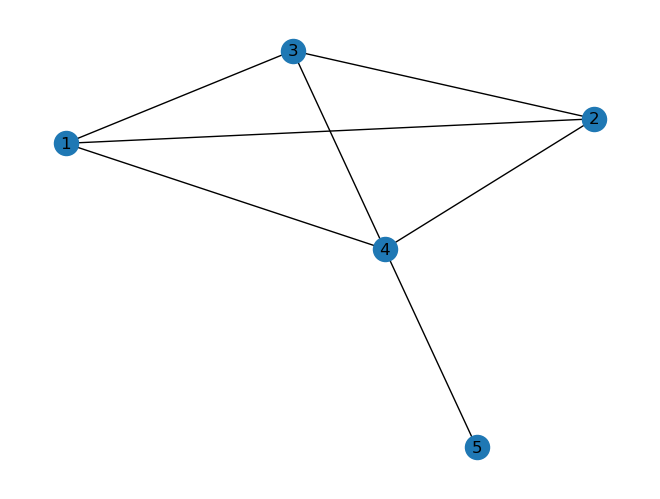

In [3]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (4, 5),(1,4)])
nx.draw(G, with_labels = True)

clique_size = 3 # Especificamos el tamaño de clique que buscamos
clique_found = find_clique(G, clique_size)

print(f"cliques encontrados de tamaño {clique_size}:")
for clique in clique_found:
    print(list(clique.nodes()))



### Ejemplo 2

Realizando el mismo procedimiento en un grafo aleatorio (del tipo powerlaw cluster).

cliques encontrados de tamaño 5:
[1, 6, 7, 8, 9]
[3, 6, 7, 8, 9]


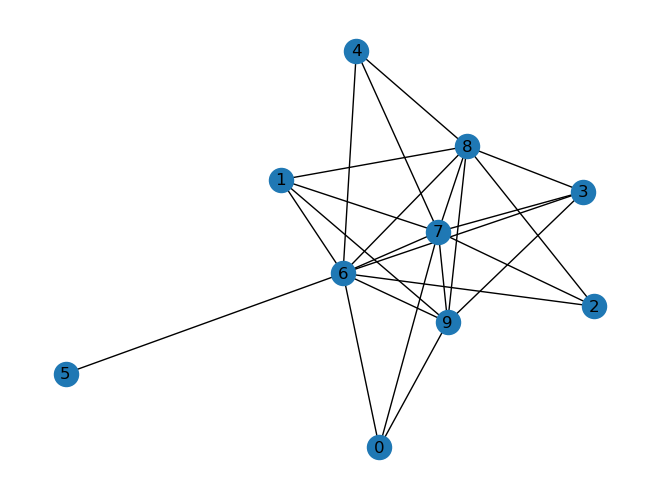

In [4]:
# Ejemplo2 Clique
G = nx.powerlaw_cluster_graph(n = 10, m = 6, p= 0.1, seed=123)
nx.draw(G, with_labels = True)

clique_size = 5
clique_found = find_clique(G, clique_size)

print(f"cliques encontrados de tamaño {clique_size}:")
for clique in clique_found:
    print(list(clique.nodes()))

## Contando Motifs

Contar Motifs es una tarea más complicada y sumamente ineficiente computacionalmente si no se realiza de la manera adecuada, es por esto que utilizaremos la libreria `dotmotif` la cual nos proporciona una herramienta rápida y eficiente para contar las estructuras que deseemos dentro de un grafo.
Para esto necesitamos instalar la librería tal como se realiza a continuación.

In [5]:
from dotmotif import Motif, GrandIsoExecutor

Para buscar las estructuras deseadas (posibles motifs)  primero debemos crear dicha configuración de la forma señalada en la librería.
A continuación se crea las configuraciones de las 4 formas de 3-node motifs mostradas en clases.

La relación "->" indica que exite una arista y "!>" indica que no debe existir dicha arista. Por lo tanto, el buscador encontrará las estructuras que cumplan lo pedido.

In [6]:
triangle_a = Motif("""
A -> B
B -> A
B -> C
C -> B
C -> A
A -> C
""")

triangle_b = Motif("""

A -> B
B -> A
B -> C
C !> B
C !> A
A -> C


""")

triangle_c = Motif("""

A -> B
B !> A
B !> C
C !> B
C !> A
A -> C

""")
triangle_d = Motif("""

A !> B
B -> A
B -> C
C !> B
C !> A
A -> C

""")

### Ejemplo 1

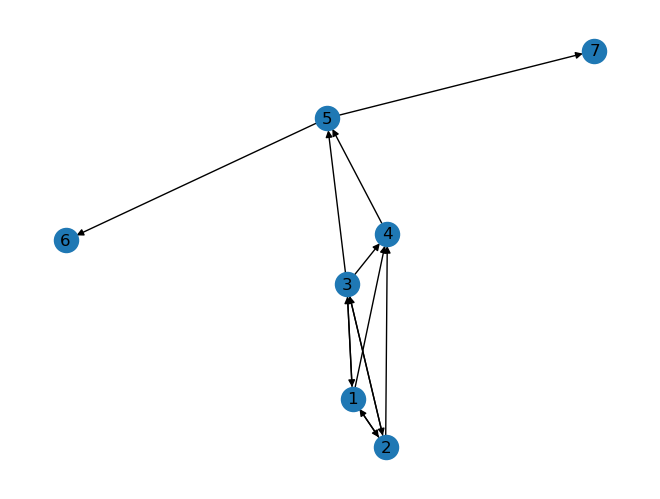

In [7]:
G = nx.DiGraph()
G.add_edges_from([(1, 2), (1, 3), (2, 3), (2, 4),
 (3, 4), (4, 5),(1,4), (3,2), (2,1), (3,1), (3,5), (5,6),(5,7)])
nx.draw(G, with_labels = True, pos=nx.spring_layout(G, seed = 12))

## Configuramos el Buscador
executor = GrandIsoExecutor(graph=G)

## Buscamos los diferentes motifs
results_a = executor.find(triangle_a)
results_b = executor.find(triangle_b)
results_c = executor.find(triangle_c)
results_d = executor.find(triangle_d)

Mostramos los resultados, de las estructuras encontradas

In [8]:
for result in [results_a, results_b, results_c, results_d]:
    print(result)

[{'A': 1, 'B': 2, 'C': 3}, {'A': 1, 'B': 3, 'C': 2}, {'A': 2, 'B': 1, 'C': 3}, {'A': 2, 'B': 3, 'C': 1}, {'A': 3, 'B': 1, 'C': 2}, {'A': 3, 'B': 2, 'C': 1}]
[{'A': 1, 'B': 2, 'C': 4}, {'A': 1, 'B': 3, 'C': 4}, {'A': 2, 'B': 1, 'C': 4}, {'A': 2, 'B': 3, 'C': 4}, {'A': 3, 'B': 1, 'C': 4}, {'A': 3, 'B': 2, 'C': 4}]
[{'A': 5, 'B': 6, 'C': 7}, {'A': 5, 'B': 7, 'C': 6}]
[{'A': 4, 'C': 5, 'B': 3}]


Es importante mencionar que en algunos casos se contarán múltiples veces el mismo sub grafo dada la simetría del motif que se busca. Sin embargo, esta amplificación de la cantidad ocurrirá cada vez que aparezca el subgrafo en cuestión y por lo tanto no afecta el análisis de sobre (o baja) representación de subgrafos.

### Ejemplo 2

Grafo aleatorio gnp.

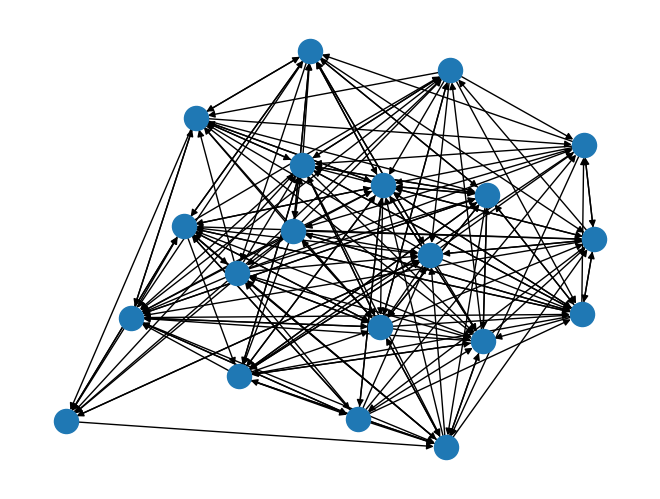

In [9]:
host = nx.fast_gnp_random_graph(20, 0.5, directed=True)

nx.draw(host)

In [10]:
## Configuramos el Buscador
executor = GrandIsoExecutor(graph=host)

## Buscamos los diferentes motifs
results_a = executor.find(triangle_a)
results_b = executor.find(triangle_b)
results_c = executor.find(triangle_c)
results_d = executor.find(triangle_d)

for result in [results_a, results_b, results_c, results_d]:
    print(len(result)) #Con repeticiones

114
70
110
91


# Z-Score

Dado que en primera instancia no sabemos cuales son los subgrafos más relevantes para un grafo  , es necesario definir una manera formal de detectar los subgrafos significativos. Para esto utilizamos la idea de Z-Score, que nos permite detectar los elementos que tienen un comportamiento "fuera de lo común".

## Grafo aleatorio

Para calcular el Z-score necesitamos saber el comportamiento de las estructuras buscadas en la familia de grafos con la misma configuración de grados que el grafo original.

A continuación se crea una función que permite crear un grafo que preserve la configuración del grafo original.

In [11]:
def generar_grafo_aleatorio_de_grados_preservados_dirigido(G):
    # Obtener la secuencia de grados de entrada y salida del grafo G
    secuencia_grados_entrada = [d for n, d in G.in_degree()]
    secuencia_grados_salida = [d for n, d in G.out_degree()]

    # Generar un grafo aleatorio dirigido con la misma secuencia de grados
    G_aleatorio = nx.directed_configuration_model(secuencia_grados_entrada, secuencia_grados_salida)

    # Convertir el grafo aleatorio a un grafo dirigido simple (eliminar multiaristas y bucles)
    #G_aleatorio = nx.DiGraph(G_aleatorio)

    return G_aleatorio

Grafo aleatorio 1:
Grados de los nodos: {0: 5, 1: 5, 2: 6, 3: 4, 4: 4, 5: 1, 6: 1}

Grafo aleatorio 2:
Grados de los nodos: {0: 5, 1: 5, 2: 6, 3: 4, 4: 4, 5: 1, 6: 1}

Grafo aleatorio 3:
Grados de los nodos: {0: 5, 1: 5, 2: 6, 3: 4, 4: 4, 5: 1, 6: 1}



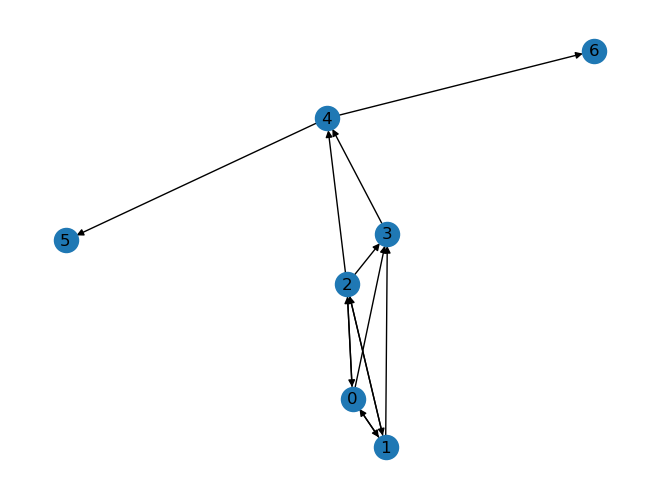

In [12]:
# Ejemplo de uso
G = nx.DiGraph()
G.add_edges_from([(0, 1), (0, 2), (1, 2), (1, 3),
 (2, 3), (3, 4),(0,3), (2,1), (1,0), (2,0), (2,4), (4,5),(4,6)])
nx.draw(G, with_labels = True, pos=nx.spring_layout(G, seed = 12))

n_grafos_aleatorios = 3

# Generar n grafos aleatorios con la misma distribución de grados que G
grafos_aleatorios = [generar_grafo_aleatorio_de_grados_preservados_dirigido(G) for _ in range(n_grafos_aleatorios)]

# Imprimir los grados de los nodos en los grafos aleatorios
for i, G_aleatorio in enumerate(grafos_aleatorios, start=1):
    print(f"Grafo aleatorio {i}:")
    print("Grados de los nodos:", dict(G_aleatorio.degree()))
    print()

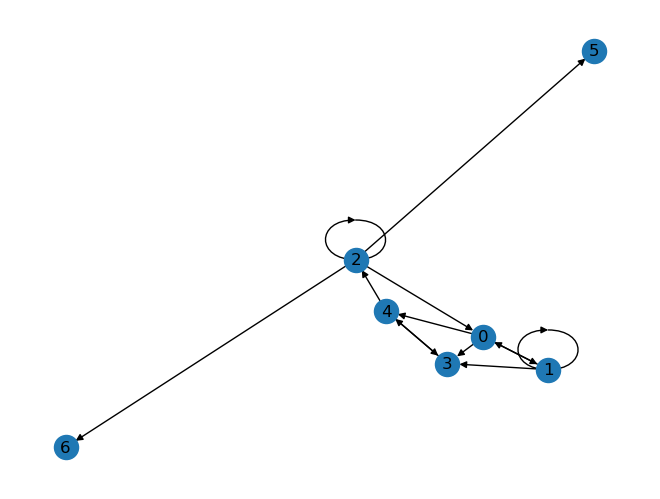

In [13]:
nx.draw(grafos_aleatorios[0], with_labels = True)

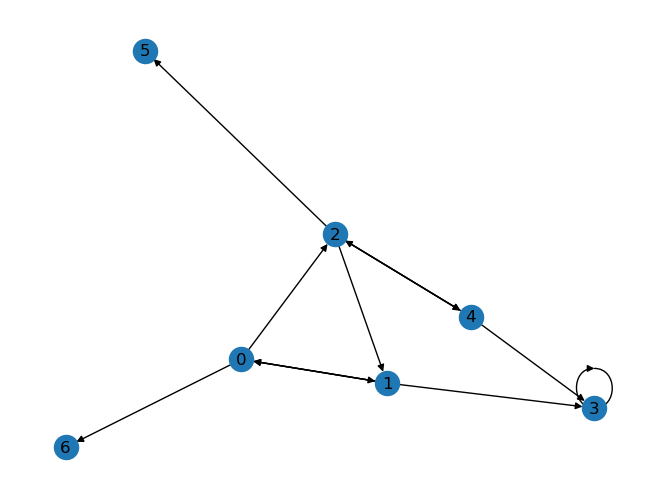

In [14]:
nx.draw(grafos_aleatorios[1], with_labels = True)

Vemos que los grafos anteriores tienen la misma configuración de grados pero son muy diferentes.

Luego de generar estos grafos aleatorios debemos contar las estructuras buscadas, esto lo realizamos anteriormente pero por conveniencia crearemos una función que cumpla este propósito.

In [15]:
def count_triangle(graph, type_triangle):

  executor = GrandIsoExecutor(graph=graph)
  motifs = executor.find(type_triangle)
    
  return len(motifs)


#count_triangle(grafos_aleatorios[2], triangle_a)
count_triangle(G, triangle_a)

6

## Calculamos Z-Score
$$Z_0(S,G) = \dfrac{O(S,G)-mean(O(M))}{\sigma(O(M))}$$
$$\mathbb{P}(X > |Z_0(S,G)|) < \alpha$$
Donde $X \sim N(0,1)$.

Dado que tenemos los ingredientes de la fórmula del Z-score simplemente generamos una función que nos pueda calcular dicho valor dado el grafo original (G) y la estructura (S) buscada.

In [16]:
def Z_score(G, type_triangle, n = 1000):

  epsilon = 0.000001
    # Generar n grafos aleatorios con la misma distribución de grados que G
  grafos_aleatorios = [generar_grafo_aleatorio_de_grados_preservados_dirigido(G) for _ in range(n)]


  count_motif = [count_triangle(grafo, type_triangle) for grafo in grafos_aleatorios]
  mean_motif = np.mean(count_motif)
  std_motif = np.std(count_motif)
  S_motif = count_triangle(G, type_triangle)
  Z = (S_motif - mean_motif)/(std_motif + epsilon)

  return np.abs(Z)

Z_score(G, triangle_b)

5.585715583879008

## Significancia

Finalmente, este Z-Score nos ayuda a decidir cuando estamos frente a un evento (cantidad de estructuras) poco común, basados en el supuesto de normalidad.

In [17]:
from scipy.stats import norm
alpha = 0.05
P = 1 - norm.cdf(Z_score(G, triangle_d))
print("P = ", P)
if P < alpha:
  print("El subgrafo triangle_c es un motif de G")

P =  0.38254716222485896
